# Wine Reviews CLASSIFICATION:
Following this blog: https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92, we'll use the Word2Vec Neural Network algorithm from the Gensim package to classify words relating to wine reviews from the an open source list of wine reviews as a variaration on the example in the above blog.
Data from Kaggle: https://www.kaggle.com/zynicide/wine-reviews


# Import data and prep:

In [2]:
import pandas as pd
from numpy import dot
from numpy.linalg import norm

#Import the reviews
reviews = pd.read_csv(r'C:\Users\jaylward\Desktop\Python Twitter API\Word2Vec Analysis\winemag-data_first150k.csv')

In [3]:
reviews.head(3)

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   

         region_1 region_2             variety                   winery  
0     Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1            Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  
2  Knights Valley   Sonoma     Sauvignon Blanc                 Macauley

In [4]:
# Select features from original dataset to form a new dataframe
#Combine relevant columns into a single col
df1 = reviews

#Convert all text to lower case as Word2Vec is case sensitive
df1['description'] = df1['description'].str.lower()

#From the decription (review), strip out special characters that add to the unique word count but have no impact on results
df2 = pd.DataFrame(df1['description'])
df2['description'].replace(',|\.|;|:|\"|\'|-|\/|%', '',regex=True,inplace=True)

df2['description'].head(3)

0    this tremendous 100 varietal wine hails from o...
1    ripe aromas of fig blackberry and cassis are s...
2    mac watson honors the memory of a wine once ma...
Name: description, dtype: object

In [5]:
#Convert review data to list of lists

sent = df2.values.tolist()
#sent2 = sent[0:5] #For debugging only
sent3 = []

#Split the text strings down into individual "tokens" with each sentence (list of lists)
# This is the required format for Word2Vec
for x in range(len(sent)):
    #print(sent[x][0])
    tmp = sent[x][0].split()
    sent3.append(tmp)

print(sent3[0:3])

[['this', 'tremendous', '100', 'varietal', 'wine', 'hails', 'from', 'oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', 'juicy', 'redcherry', 'fruit', 'and', 'a', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', 'framed', 'by', 'elegant', 'fine', 'tannins', 'and', 'a', 'subtle', 'minty', 'tone', 'in', 'the', 'background', 'balanced', 'and', 'rewarding', 'from', 'start', 'to', 'finish', 'it', 'has', 'years', 'ahead', 'of', 'it', 'to', 'develop', 'further', 'nuance', 'enjoy', '2022–2030'], ['ripe', 'aromas', 'of', 'fig', 'blackberry', 'and', 'cassis', 'are', 'softened', 'and', 'sweetened', 'by', 'a', 'slathering', 'of', 'oaky', 'chocolate', 'and', 'vanilla', 'this', 'is', 'full', 'layered', 'intense', 'and', 'cushioned', 'on', 'the', 'palate', 'with', 'rich', 'flavors', 'of', 'chocolaty', 'black', 'fruits', 'and', 'baking', 'spices', 'a', 'toasty', 'everlasting', 'finish', 'is', 'heady', 'but', 'ideally', 'balanced', 'drink', 'through', '2023'], ['mac

# Run model:

In [6]:
#Import Word2Vec from gensim
from gensim.models import Word2Vec

#size = number of vectors (default is 50)
# sg = skip-gram vs Continuous Bagging Of Words (CBOW)
model = Word2Vec(sent3, min_count=1,size= 100, sg = 1)

In [7]:
#Check outputs - works!
model['caramel']

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.14662553, -0.18827055, -0.15003632, -0.05024373, -0.12590055,
        0.29684955, -0.3419854 , -0.11672132, -0.38480002, -0.61107737,
        0.11330359,  0.41800466,  0.09546213,  0.16920812, -0.05871863,
       -0.23345579,  0.1558694 , -0.2954448 ,  0.6146709 , -0.3793586 ,
       -0.01242746,  0.02098558,  0.14696965, -0.21155979, -0.4328607 ,
       -0.09033823, -0.33599508, -0.2732258 , -0.09728562, -0.08442828,
       -0.31973487,  0.33198273, -0.0838201 , -1.1083974 ,  0.75964415,
       -0.32565922, -0.28043988, -0.2789484 , -0.13076493,  0.29246476,
        0.34863147,  0.27812508,  0.15375984, -0.34471974,  0.18039268,
        0.11723843, -0.18331617,  0.44546524,  0.3783335 , -0.14011791,
       -0.08884018,  0.4132914 , -0.1375508 ,  0.09439957,  0.32149157,
       -0.19901341, -0.1771709 ,  0.8173546 , -0.46665224, -0.13511592,
       -0.22589444,  0.01555471, -0.06648894, -0.7440019 , -0.36832282,
       -0.06651232,  0.11443897,  0.3685071 , -0.00958723,  0.20

In [8]:
#Check the similarity between two words
model.similarity('caramel', 'chocolate')


C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


0.6196108

In [9]:
#Find most similar words to chosen word
model.most_similar('chardonnay')

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('chard', 0.8427708148956299),
 ('blanc', 0.7338172197341919),
 ('semillon', 0.7032606601715088),
 ('gris', 0.6943175792694092),
 ('grigio', 0.6846970915794373),
 ('barrelfermented', 0.6815250515937805),
 ('tankfermented', 0.6778125762939453),
 ('leesy', 0.6722121238708496),
 ('pg', 0.6599864363670349),
 ('riesling', 0.6589305996894836)]

In [10]:
# List the unique words within the entire list:
# 1) First extract all words into a single list:
listofwords = []

for x in range(len(sent3)):
    #print(sent3[x])
    for y in range(len(sent3[x])):
        #print(len(sent3[x][0]))
        #print(x,y)
        #print(sent3[x][y])
        listofwords.append(sent3[x][y])


In [11]:
# 2) Then select only unique values:
listofwords_unique = [] 
      
# traverse for all elements and compile into a single list of unique words
for x in listofwords: 
    # check if exists in unique_list or not 
    if x not in listofwords_unique: 
        listofwords_unique.append(x) 

In [12]:
print(listofwords[0:50],len(listofwords))

['this', 'tremendous', '100', 'varietal', 'wine', 'hails', 'from', 'oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', 'juicy', 'redcherry', 'fruit', 'and', 'a', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', 'framed', 'by', 'elegant', 'fine', 'tannins', 'and', 'a', 'subtle', 'minty', 'tone', 'in', 'the', 'background', 'balanced', 'and', 'rewarding', 'from', 'start', 'to', 'finish', 'it', 'has'] 6064690


In [13]:
#Confirm outputs
print(len(listofwords_unique), len(listofwords))

47893 6064690


In [14]:
# **** FYI - a neater way to summarise the vocabulary by extracting "vocab" from the model
neat_words = list(model.wv.vocab)
print(listofwords_unique[0:100])

['this', 'tremendous', '100', 'varietal', 'wine', 'hails', 'from', 'oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', 'juicy', 'redcherry', 'fruit', 'a', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', 'framed', 'by', 'elegant', 'fine', 'tannins', 'subtle', 'minty', 'tone', 'background', 'balanced', 'rewarding', 'start', 'to', 'finish', 'it', 'has', 'ahead', 'develop', 'further', 'nuance', 'enjoy', '2022–2030', 'ripe', 'aromas', 'fig', 'blackberry', 'cassis', 'are', 'softened', 'sweetened', 'slathering', 'oaky', 'chocolate', 'vanilla', 'is', 'full', 'layered', 'intense', 'cushioned', 'on', 'with', 'rich', 'flavors', 'chocolaty', 'black', 'fruits', 'baking', 'spices', 'toasty', 'everlasting', 'heady', 'but', 'ideally', 'drink', 'through', '2023', 'mac', 'watson', 'honors', 'memory', 'once', 'made', 'his', 'mother', 'tremendously', 'delicious', 'complex', 'botrytised', 'white', 'dark', 'gold', 'color', 'layers']


In [15]:
#Cosine Similarity (another way of measuring similarity of the word vectors based on angle between vectors in multi dim space)
# Should deliver better results
def cosine_distance (model, word,target_list , num):
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [16]:
#Return the most similar words by Cosine angle
cosine_distance (model,'chardonnay',listofwords_unique,10)

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('chard', 0.84277093),
 ('blanc', 0.73381734),
 ('semillon', 0.7032606),
 ('gris', 0.6943175),
 ('grigio', 0.684697),
 ('barrelfermented', 0.681525),
 ('tankfermented', 0.6778125),
 ('leesy', 0.67221224),
 ('pg', 0.65998656),
 ('riesling', 0.6589306)]

# Visualising the outputs:
We've created a model of vectors in 100 dimensions which isn't easy to plot!
By using different techniques we can reduce down the "dimensionality" of the data into 2 or 3 dimensions which will allow us visualise the data. We'll test 2 different techniques, PCA and t-SNE for this.

In [17]:
#Visualising outputs using PCA and tSNE from this blog here:
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
    
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA #Grab PCA functions
#Command below makes matplotlib interactive
%matplotlib notebook

#Transform vectors to 3 dimentions using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(model[listofwords_unique])

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [18]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#Results held in numpy array
print(type(pca_result))

#Import results to pandas df
pca_df = pd.DataFrame(pca_result, columns = ['pca-1','pca-2','pca-3'])
pca_df.head()

Explained variation per principal component: [0.15240005 0.07865795 0.05197558]
<class 'numpy.ndarray'>


pca-1     pca-2     pca-3
0  0.493036  0.659432  0.018499
1  0.851385  0.676259 -0.061789
2  0.467917  1.165650  0.291755
3  0.941807  0.725345  0.087053
4  0.677981  0.407573 -0.133809

In [19]:
#Import Word2Vec model vectors into pandas df
model_df = pd.DataFrame(model[listofwords_unique])

#Concatenate the PCA results back on the words vector to build a summary df
model_df['word'] = listofwords_unique
model_df = pd.concat([model_df, pca_df], axis=1, sort=False)

model_df.head()

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0         1         2         3         4         5         6  \
0  0.035516  0.025735  0.248824 -0.069471  0.276119 -0.026537  0.059869   
1  0.011754 -0.142216  0.180552 -0.510631  0.127657 -0.284775  0.027961   
2 -0.140762 -0.090652  0.276069 -0.172367  0.365738  0.281034 -0.488057   
3 -0.205966 -0.193406 -0.035758 -0.203191  0.170687  0.031690  0.185745   
4 -0.109703 -0.006092  0.022172  0.091896  0.196067  0.180255  0.205798   

          7         8         9  ...        94        95        96        97  \
0  0.010129 -0.044390 -0.474282  ...  0.361824 -0.009015  0.284046 -0.367541   
1 -0.092098 -0.071705 -0.466617  ...  0.686789 -0.413192  0.282663 -0.472910   
2  0.049472  0.055816 -0.611331  ...  0.312717 -0.113126  0.041934 -0.161373   
3  0.084719 -0.059597 -0.807815  ...  0.091136 -0.047095  0.150440 -0.481876   
4  0.160686  0.082226 -0.249565  ...  0.009381  0.110963  0.097852 -0.279539   

         98        99        word     pca-1     pca-2     pca-3  
0 -0.060710 -0.034251        this  0.493036  0.659432  0.018499  
1 -0.161347 -0.162030  tremendous  0.851385  0.676259 -0.061789  
2 -0.580593  0.110625         100  0.467917  1.165650  0.291755  
3  0.107621 -0.487947    varietal  0.941807  0.725345  0.087053  
4 -0.182810  0.115909        wine  0.677981  0.407573 -0.133809  

[5 rows x 104 columns]

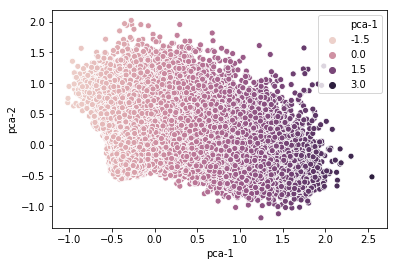

In [20]:
#Using Seaborn, scatter the 2 dimensional results from the Principle Comonent Analysis
ax = sns.scatterplot(x="pca-1", y="pca-2", data=model_df[['pca-1','pca-2','word']], hue="pca-1", legend = 'brief')

#This doesn't really tell us much...

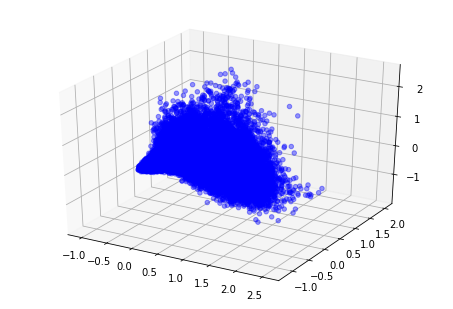

In [21]:
#Let's try a 3d visualisation of the PCA results using matplotlib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax = Axes3D(fig)

# It looks a bit better but still not very usefull
ax.scatter(model_df['pca-1'], model_df['pca-2'], model_df['pca-3'], color = 'blue', alpha = 0.4)
pyplot.show()

In [22]:
#Lets try with t-SNE which should do a beter job at reducing the dimensions down
#Following this blog here:
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
#How with t-SNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pd.DataFrame(model[listofwords_unique])) #The raw output of the Word2Vec model
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 47893 samples in 2.302s...
[t-SNE] Computed neighbors for 47893 samples in 823.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47893
[t-SNE] Computed conditional probabilities for sample 2000 / 47893
[t-SNE] Computed conditional probabilities for sample 3000 / 47893
[t-SNE] Computed conditional probabilities for sample 4000 / 47893
[t-SNE] Computed conditional probabilities for sample 5000 / 47893
[t-SNE] Computed conditional probabilities for sample 6000 / 47893
[t-SNE] Computed conditional probabilities for sample 7000 / 47893
[t-SNE] Computed conditional probabilities for sample 8000 / 47893
[t-SNE] Computed conditional probabilities for sample 9000 / 47893
[t-SNE] Computed conditional probabilities for sample 10000 / 47893
[t-SNE] Computed conditional probabilities for sample 11000 / 47893
[t-SNE] Computed conditional probabilities for sample 12000 / 47893
[t-SNE] Computed conditional probabilities for 

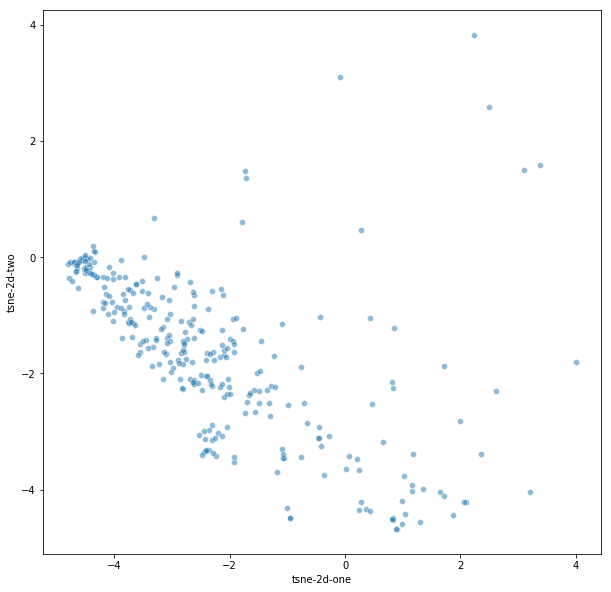

In [60]:
#Add tSNE results back into the model_df outputs summary
model_df['tsne-2d-one'] = tsne_results[:,0]
model_df['tsne-2d-two'] = tsne_results[:,1]
%matplotlib inline

#Cut down the list to the top N words. Don't want to plot 48k points!
#Note that more commonly used words will generally be located towards the top of the df
#This is a result of process used to create unique words, although this is not the same as sorting by number of instances
model_df_top_words = model_df[:300]


plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    data= model_df_top_words,
    legend="brief",
    alpha=0.5
)



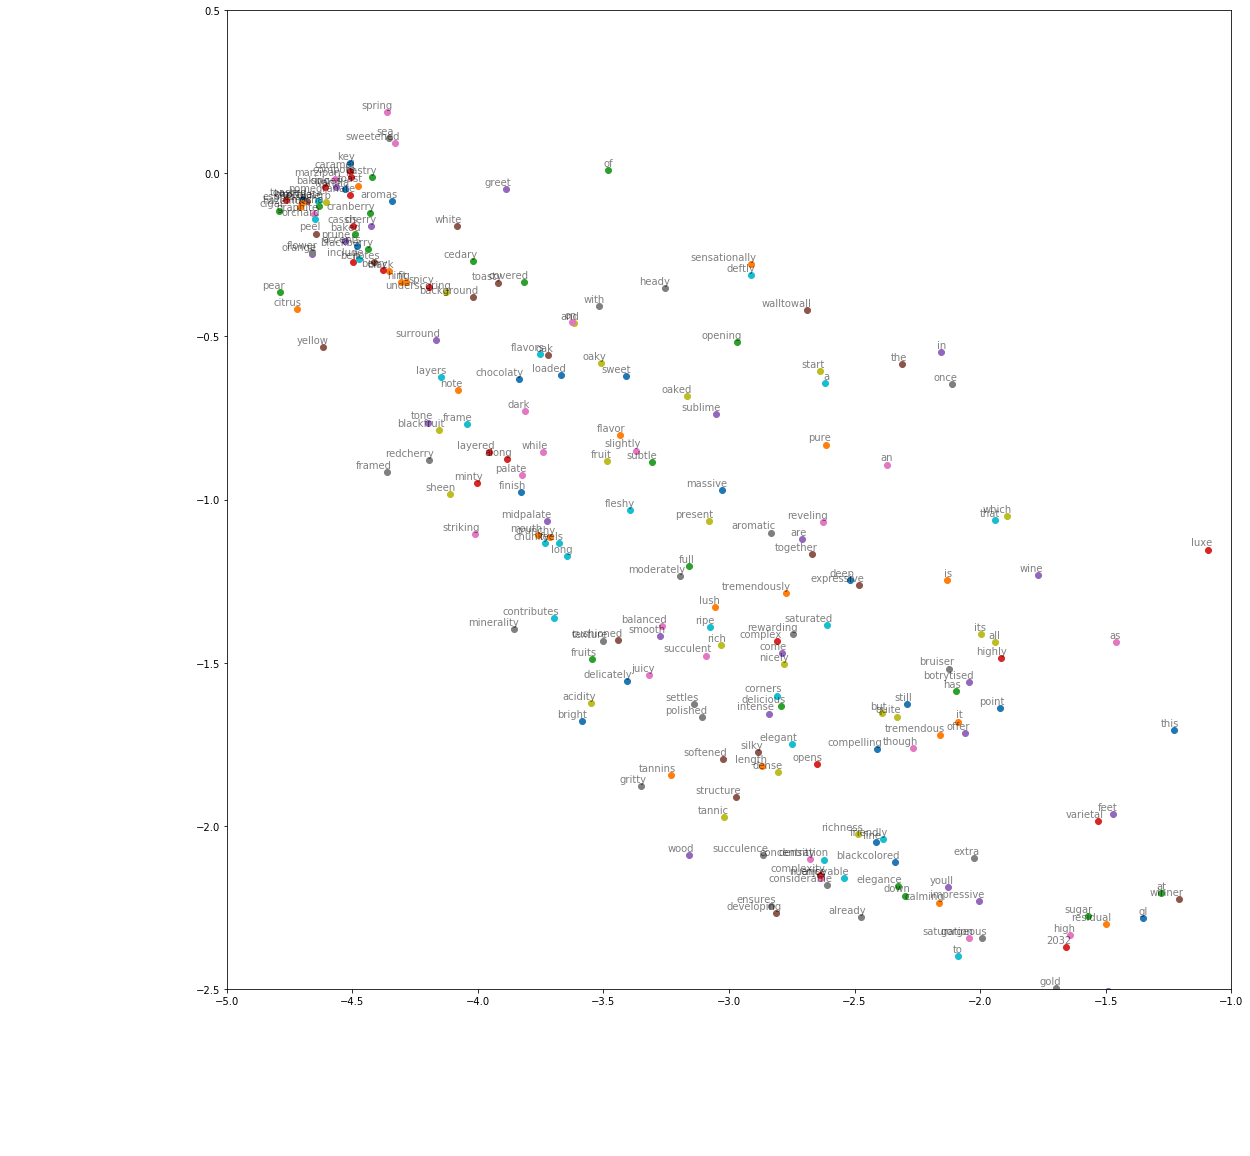

In [59]:
# Take 2 - using script from AWS Magermaker Blazing Text Youtuve Tutorial: https://www.youtube.com/watch?v=R0vC31OXt-g
# Build annotated scatter for top words
# This some cropping and annotation, this is now looking really good!
# We're only using the first 300 words, but there are definitely nice groupings appearing

from matplotlib import pylab

product_titles = model_df_top_words['word']
embeddings = tsne_results[:300] #Top 300 results only to match top 300 product titles

%matplotlib inline

def plot(embeddings, labels):
    pylab.figure(figsize = (18,18))
    for i, label in enumerate(labels):
        x,y = embeddings[i,:]
        pylab.scatter(x,y)
        pylab.xlim(-5, -1)
        pylab.ylim(-2.5, 0.5)
        pylab.annotate(label, xy = (x, y), xytext = (5,2), textcoords = 'offset points', 
                      ha = 'right', va = 'bottom', alpha = 0.5)
    pylab.show()

plot(embeddings, product_titles[:300])

In [61]:
#Output the data to CSV
model_df.to_csv(r'C:\Users\jaylward\Desktop\Python Twitter API\Word2Vec Analysis\winemag-data_results.csv')